# 회귀분석

In [1]:
# 패키지 임포트 
import os 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

import pandas as pd # pandas package
import numpy as np  # numpy package  
import math
from scipy import stats  # Scipy Package 

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline


# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

## 1. 데이터셋 

###  sklearn - load_diabetes
- 당뇨병 진행도 예측용 데이터는 442명의 당뇨병 환자를 대상으로한 검사 결과를 나타내는 데이터
- 10 종류의 독립변수, 독립변수의 값들은 모두 스케일링(scaling) 
#### 종속변수 
- target : 1년 뒤 측정한 당뇨병의 진행률  

#### 독립변수 
- age: 나이
- sex: 성별
- bmi: BMI(Body mass index)지수
- bp: 평균혈압
- s1~s6: 6종류의 혈액검사수치


In [2]:
## 데이터셋 로드 
from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
# df.head()

## 상관관계 확인 
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


### 단순 선형회귀분석을 위해 선형 관계가 있는  bmi, target 변수 선정 

## 1. 단순 선형 회귀 분석 

### 1) 데이터 탐색 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


<AxesSubplot:xlabel='bmi', ylabel='target'>

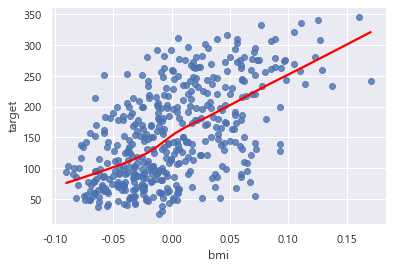

In [4]:
# 산점도 확인 
sns.regplot('bmi', 'target', lowess=True, line_kws={'color': 'red'}, data = df)

Text(0.5, 1.0, 'rate')

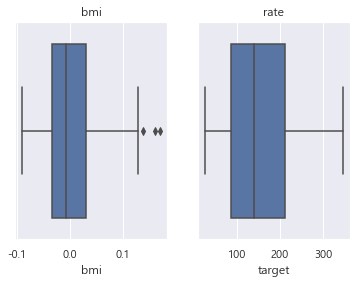

In [5]:
### 이상값 확인 
fig, (ax1, ax2) = plt.subplots(1, 2)  

sns.boxplot('bmi', data=df, ax=ax1)
ax1.set_title('bmi')

# dist의 상자 그림을 두번째(ax2)로 그린다.
sns.boxplot('target', data=df, ax=ax2)
ax2.set_title('rate')

Text(0.5, 1.0, 'rate')

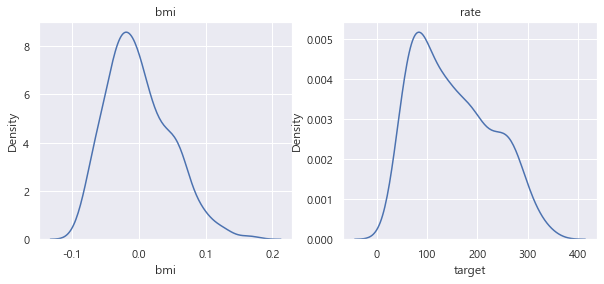

In [6]:
## 분포 시각화 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))  

sns.kdeplot(df['bmi'], ax=ax1)
ax1.set_title('bmi')

sns.kdeplot(df['target'], ax=ax2)
ax2.set_title('rate')

In [7]:
# 비대칭 확인(왜도)
import scipy.stats

print(scipy.stats.skew(df['bmi']))
print(scipy.stats.skew(df['target']))

0.5961166556214373
0.43906639932477265


### 2) 단순선형회귀- sklearn 
#### from sklearn.linear_model import LinearRegression

In [8]:
# 데이터 셋 생성 
X = df.bmi.values
y = df.target.values

l_train_X1 = X.reshape(-1,1)
l_test_y1 = y.reshape(-1,1)

print(X.shape)
print(l_train_X1.shape)

(442,)
(442, 1)


In [9]:
## 모델 학습 
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(l_train_X1, l_test_y1)

LinearRegression()

In [10]:
## 회귀계수 확인 
print(lr_model.coef_[0])
print(lr_model.intercept_)

[949.43526038]
[152.13348416]


In [11]:
## 선형회귀모델로 값 예측 
lr_model.predict([[-2], [-1], [0], [1], [2]])

array([[-1746.73703661],
       [ -797.30177622],
       [  152.13348416],
       [ 1101.56874455],
       [ 2051.00400493]])

In [12]:
## 잔차 계산 
lr_prediction = lr_model.predict(l_train_X1)
lr_residuals = l_test_y1 - lr_prediction

In [13]:
# R_squared 계산 
SSE = (lr_residuals**2).sum()
SST = ((l_test_y1-l_test_y1.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared: ', R_squared)

R_squared:  0.3439237602253803


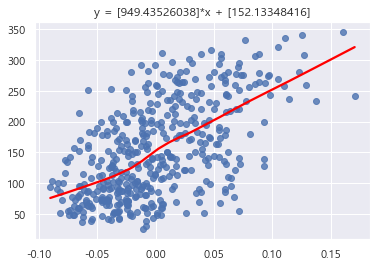

In [14]:
# 단순회귀모형 시각화 
sns.regplot(l_train_X1, l_test_y1, lowess=True,  line_kws={'color': 'red'}, data = df)
plt.title('y = {}*x + {}'.format(lr_model.coef_[0], lr_model.intercept_))
plt.show()

### 3) 단순 선형 회귀 통계적 분석 
#### from statsmodels.formula.api import ols

In [18]:
from statsmodels.formula.api import ols

res_sr = ols('target ~ bmi', data=df).fit() # 종속변수 : target, 독립변수: bmi  

In [19]:
# 결과 확인 
res_sr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           3.47e-42
Time:                        21:27:37   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4) 회귀분석 결과 
#### 첫번째 표  
- DF Model(독립 변수 개수): 1 
- No. Observations(표본 수) :442 
- DF Residuals(잔차의 자유도: 표본수 - 종속변수 개수 - 독립변수 개수) : 440  
- R-Squared(결정 계수) : 0.344(1에 가까울 수록 좋음) 
- Adj.R-Squared(조정된 결정 계수) : 0.342 
- F-statistic : 230.7(0에 가까울 수록 적절)
- Prob (F-statistic) : 3.47e-42(0.5 이하일 수록 회귀계수는 0이 아니다.) <= 유 의미함 

#### 두번째 표 
- Coef(데이터로부터 얻은 회귀 계수의 추정치) : $target = bmi$  X  $949.4353 + 152.1335$
- std err(계수 추정치의 표준 오차, 작을 수록 좋음)
- t(t-test, 독립변수와 종속변수 사이의 상관관계) 
- P>|t|(독립변수들의 유의 확률: 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률인 p값, 0.05보다 작을 수록 좋음) $P>|t|<0.05$  <= 유의미함 

### 결과 요약
#### 모형적합도
- tartget 대하여 bmi로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다(F(1,440) = 230.7, p < 0.05)
#### 독립변수 
- bmi의 회귀계수는 949.4353로, target에 대하여 유의미한 예측변인인 것으로 나타났다(t(440) = 15.187	, p < 0.05)

In [20]:
## 이상값 삭제 후 R결정계수 확인 

df_o = df[['bmi', 'target']]

# 기술 통계 정보로 pencentile 확인 
df_o.describe()

,bmi,target
count,4.420000e+02,442.000000
mean,-8.013951e-16,152.133484
std,4.761905e-02,77.093005
min,-9.027530e-02,25.000000
25%,-3.422907e-02,87.000000
50%,-7.283766e-03,140.500000
75%,3.124802e-02,211.500000
max,1.705552e-01,346.000000


In [22]:
# 이상값 계산 하는 함수 
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 확인 
outlier_idx = get_outlier(df=df_o, column='bmi', weight=1.5)

# 이상치 삭제 
df_o.drop(outlier_idx, axis=0, inplace=True)

C:\Users\bigdata\anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
print(df.shape)
print(df_o.shape) # 3건 삭제 

(442, 11)
(438, 2)


In [24]:
from statsmodels.formula.api import ols

result_o = ols('target ~ bmi', data=df_o).fit() # 종속변수 : target, 독립변수: bmi  

In [25]:
result_o.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     216.0
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           5.25e-40
Time:                        21:27:51   Log-Likelihood:                -2432.5
No. Observations:                 438   AIC:                             4869.
Df Residuals:                     436   BIC:                             4877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.3731      2.994     50.901      0.000     146.490     158.257
bmi          965.4078     65.685     14.697      0.000     836.308    1094.507
==============================================================================
Omnibus:                       10.570   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                6.686
Skew:                           0.143   Prob(JB):                       0.0353
Kurtosis:                       2.466   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 이상값 삭제 전 : Adj. R-squared:	0.342
#### 이상값 삭제 후 : Adj. R-squared:	0.333 


## 2. 다중선형회귀모형 


### 1) 데이터 탐색 

In [26]:
print(df.shape)
df.head(3)

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [27]:
# sns.pairplot(df)
# plt.show()

In [28]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


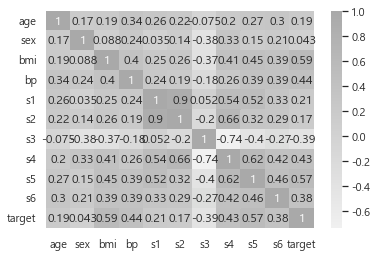

In [29]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()

### 2) 다중선형회귀분석 - sklearn
#### from sklearn.linear_model import LinearRegression

In [30]:
# 데이터 셋 준비 
dlr_train_X_df = df.copy()
dlr_train_X_df = dlr_train_X_df.drop("target", 1)

dlr_test_y = df.target.values
dlr_test_y = dlr_test_y.reshape(-1,1)

In [31]:
# LinearRegression

dlr_model = LinearRegression()

dlr_model.fit(X = dlr_train_X_df, y= dlr_test_y)
# linear_regression.fit(X=pd.DataFrame(X), y=y)

print('절편: ', dlr_model.intercept_)
print('회귀계수: ', dlr_model.coef_)

절편:  [152.13348416]
회귀계수:  [[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
   476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]]


In [32]:
# 잔차
prediction = dlr_model.predict(dlr_train_X_df)
residuals = dlr_test_y - prediction

# residuals.describe()

In [33]:
# R_squared 계산 

SSE = (residuals**2).sum()
SST = ((dlr_test_y-dlr_test_y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared: ', R_squared)

R_squared:  0.5177494254132934


In [34]:
# 모델 평가 MSE & RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(dlr_test_y, prediction)
print(mse)
rmse = sqrt(mse)
print(rmse)

print('score = ', dlr_model.score(X=dlr_train_X_df, y=dlr_test_y))
print('mean_squared_error = ', mse)
print('RMSE = ', rmse)

2859.6903987680657
53.47607314274362
score =  0.5177494254132934
mean_squared_error =  2859.6903987680657
RMSE =  53.47607314274362


### 3) 다중선형회귀 - 통계적 데이터 분석 

In [35]:
print(df.shape)
df.head(3)

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [36]:
from statsmodels.formula.api import ols

s_d_model = ols('target ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6', df)

In [37]:
m_result = s_d_model.fit()

In [38]:
m_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           3.83e-62
Time:                        21:28:16   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3) 다중 공선선 확인

### 다중공선성 확인 

In [39]:
### VIF(분산팽창요인) 계산 - 10이 넘어가는 값 => 다중공선성 판단 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# 회귀분석 모형 변수 
print(s_d_model.exog_names)

# bmi의 VIF
print(variance_inflation_factor(s_d_model.exog, 1))

# 독립변수 VIF 
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(s_d_model.exog, i)} 
             for i, column in enumerate(s_d_model.exog_names)
             if column != 'Intercept')  # 절편 제외 

['Intercept', 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
1.2173065764321338


,컬럼,VIF
0,age,1.217307
1,sex,1.278073
2,bmi,1.509446
3,bp,1.459429
4,s1,59.203786
5,s2,39.194379
6,s3,15.402352
7,s4,8.890986
8,s5,10.076222
9,s6,1.484623


In [474]:
# vif1 = df.drop("s1",axis=1)

# v1_model = ols('target ~ age+sex+bmi+bp+s2+s3+s4+s5+s6', vif1)
# v1_result = v1_model.fit()
# # v1_result.summary()

In [475]:
# # 독립변수 VIF 
# pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(v1_model.exog, i)} 
#              for i, column in enumerate(v1_model.exog_names)
#              if column != 'Intercept')  # 절편 제외 

,컬럼,VIF
0,age,1.216892
1,sex,1.275050
2,bmi,1.502327
3,bp,1.457415
4,s2,2.926545
5,s3,3.736893
6,s4,7.818675
7,s5,2.172865
8,s6,1.484410


In [485]:
# vif1["s1_s2"] = df["s1"] + df["s2"]

In [486]:
# vif1.head()

,age,sex,bmi,bp,s2,s3,s4,s5,s6,target,s1_s2
0,0.038076,0.050680,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,-0.079044
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,-0.027612
2,0.085299,0.050680,0.044451,-0.005671,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,-0.079794
3,-0.089063,-0.044642,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,0.037181
4,0.005383,-0.044642,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0.019531


In [488]:
# v1_model = ols('target ~ age+sex+bmi+bp+s2+s3+s4+s5+s6+s1_s2', vif1)
# v1_result = v1_model.fit()
# v1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           3.83e-62
Time:                        15:52:41   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s2          1268.9300    748.570      1.695      0.091    -202.372    2740.232
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
s1_s2       -792.1842    416.684     -1.901      0.058   -1611.169      26.801
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [489]:
# # 독립변수 VIF 
# pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(v1_model.exog, i)} 
#              for i, column in enumerate(v1_model.exog_names)
#              if column != 'Intercept')  # 절편 제외 

,컬럼,VIF
0,age,1.217307
1,sex,1.278073
2,bmi,1.509446
3,bp,1.459429
4,s2,191.073794
5,s3,15.402352
6,s4,8.890986
7,s5,10.076222
8,s6,1.484623
9,s1_s2,224.579255


In [490]:
# vif2 = vif1.drop("s2",axis=1)

# v2_model = ols('target ~ age+sex+bmi+bp+s3+s5+s6+s1_s2', vif2)
# v2_result = v2_model.fit()
# v2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     57.24
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           3.42e-63
Time:                        15:53:55   Log-Likelihood:                -2387.7
No. Observations:                 442   AIC:                             4793.
Df Residuals:                     433   BIC:                             4830.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.580     58.970      0.000     147.063     157.204
age           -7.9936     59.801     -0.134      0.894    -125.530     109.543
sex         -232.0418     61.098     -3.798      0.000    -352.127    -111.957
bmi          526.8847     66.352      7.941      0.000     396.473     657.296
bp           317.0794     65.251      4.859      0.000     188.832     445.327
s3          -265.1508     66.615     -3.980      0.000    -396.080    -134.221
s5           506.7990     72.441      6.996      0.000     364.420     649.178
s6            72.3339     65.920      1.097      0.273     -57.229     201.897
s1_s2        -63.3697     31.817     -1.992      0.047    -125.905      -0.834
==============================================================================
Omnibus:                        1.698   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.558
Skew:                           0.035   Prob(JB):                        0.459
Kurtosis:                       2.718   Cond. No.                         34.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [491]:
# # 독립변수 VIF 
# pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(v2_model.exog, i)} 
#              for i, column in enumerate(v2_model.exog_names)
#              if column != 'Intercept')  # 절편 제외 

,컬럼,VIF
0,age,1.215642
1,sex,1.268927
2,bmi,1.496551
3,bp,1.447310
4,s3,1.508467
5,s5,1.783827
6,s6,1.477155
7,s1_s2,1.305378


#### 계수가 통계적으로 유의미하지 않다면 대처
- 계수가 통계적으로 유의미하다면 VIF가 크더라도 특별히 대처할 필요없음
#### 변수들을 더하거나 빼서 새로운 변수를 만든다
- (개념적으로나 이론적으로) 두 예측변수를 더하거나 빼더라도 문제가 없는 경우
- 예) 남편의 수입과 아내의 수입이 서로 상관이 높다면, 두 개를 더해 가족 수입이라는 하나의 변수로 투입한다
- 더하거나 빼기 어려운 경우는 변수를 모형에서 제거한다
  -- 단, 변수를 제거하는 것은 자료의 다양성을 해치고, 분석하려던 가설이나 이론에 영향을 미칠 수 있기 때문에 가급적 자제


### 4) 잔차 분석 

In [49]:
# # 데이터 셋 준비 
# dlr_train_X_df = df.copy()
# dlr_train_X_df = dlr_train_X_df.drop("target", 1)

# dlr_test_y = df.target.values
# dlr_test_y = dlr_test_y.reshape(-1,1)

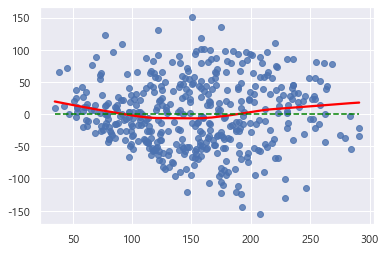

In [40]:
## 선형성 
s_d_res_fit = m_result.predict(df)
s_d_residuals = df['target'] - s_d_res_fit

# 선형성 시각화(red : 잔차)
sns.regplot(s_d_res_fit, s_d_residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([s_d_res_fit.min(), s_d_res_fit.max()], [0, 0], '--', color='green')

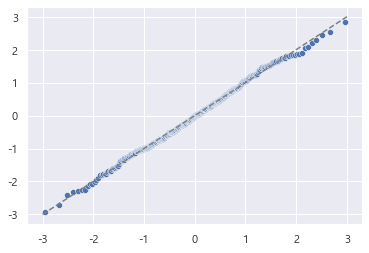

In [41]:
## 정규성 확인 (QQplot, 점 값이 선을 따라 배치되는 것이 이상적)
s_d_sr = stats.zscore(s_d_residuals)
(s_d_x, s_d_y), _ = stats.probplot(s_d_sr)

# 정규성 시각화 
sns.scatterplot(s_d_x, s_d_y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

<AxesSubplot:>

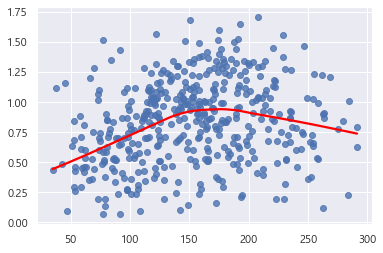

In [42]:
## 잔차의 등분산성(수평선이 이상정)
sns.regplot(s_d_res_fit, np.sqrt(np.abs(s_d_sr)), lowess=True, line_kws={'color': 'red'})

In [43]:
## 극단값 확인 
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(m_result).cooks_distance # Cook's Distance 
cd.sort_values(ascending=False).head()

382    0.024475
123    0.021349
169    0.019560
304    0.018942
92     0.018134
dtype: float64